In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Set working directory for Google Colab
os.chdir('/content')
csv_file_path = "Sweden.csv" # Changed file path to Sweden

# ✅ Load data for Sweden
try:
    df = pd.read_csv(csv_file_path)
    df_sweden = df[df['Country Name'] == 'Sweden'].copy() # Filter for Sweden
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
    exit()

# ✅ Indicators of interest (same as before)
indicator_codes = [
    "SE.ADT.LITR.FE.ZS", "SE.ADT.LITR.MA.ZS",   # Literacy
    "SE.SEC.ENRR.FE", "SE.SEC.ENRR.MA",         # Secondary enrollment
    "SE.TER.ENRR.FE", "SE.TER.ENRR.MA",         # Tertiary enrollment
    "SL.TLF.CACT.FE.ZS", "SL.TLF.CACT.MA.ZS",   # Labor force participation
    "SL.EMP.WORK.FE.ZS", "SL.EMP.WORK.MA.ZS",   # Employment to population
    "SL.AGR.EMPL.FE.ZS", "SL.AGR.EMPL.MA.ZS",   # Agriculture employment
    "SL.UEM.TOTL.FE.ZS", "SL.UEM.TOTL.MA.ZS",   # Unemployment
    "IC.FRM.FEMO.ZS", "IC.FRM.BNKS.ZS",          # Business indicators
    "SP.DYN.LE00.MA.IN", "SP.DYN.LE00.FE.IN",   # Life expectancy
    "SG.GEN.PARL.ZS",                          # Political participation
    "SL.EMP.VULN.FE.ZS", "SL.EMP.VULN.MA.ZS",    # Vulnerable employment
    "SH.STA.MMRT",                              # Maternal mortality ratio
    "SE.PRM.CMPT.MA.ZS", "SE.PRM.CMPT.FE.ZS",    # Primary completion rate
    "SE.SEC.CMPT.LO.FE.ZS", "SE.SEC.CMPT.LO.MA.ZS", # Lower secondary completion
    "SE.TER.CMPL.FE.ZS", "SE.TER.CMPL.MA.ZS",    # Tertiary completion rate
    "IT.NET.USER.MA.ZS", "IT.NET.USER.FE.ZS"     # Internet users
]

# ✅ Filter data for selected indicators for Sweden
df_filtered = df_sweden[df_sweden["Indicator Code"].isin(indicator_codes)].copy()

# ✅ Pivot the table for Sweden (result will be df_pivot)
try:
    df_pivot = df_filtered.pivot(index="Year", columns="Indicator Code", values="Value") # Removed .dropna()
except ValueError:
    print("Error during pivoting Sweden data. Please check for duplicate Year-Indicator Code combinations.")
    print(df_filtered[['Year', 'Indicator Code']].value_counts().head())
    df_pivot = pd.DataFrame() # Create an empty DataFrame

# ✅ Compute gender gaps for Sweden
if not df_pivot.empty:
    if "SE.ADT.LITR.MA.ZS" in df_pivot.columns and "SE.ADT.LITR.FE.ZS" in df_pivot.columns:
        df_pivot["literacy_gap"] = df_pivot["SE.ADT.LITR.MA.ZS"] - df_pivot["SE.ADT.LITR.FE.ZS"]
    if "SE.SEC.ENRR.MA" in df_pivot.columns and "SE.SEC.ENRR.FE" in df_pivot.columns:
        df_pivot["sec_enroll_gap"] = df_pivot["SE.SEC.ENRR.MA"] - df_pivot["SE.SEC.ENRR.FE"]
    if "SE.TER.ENRR.MA" in df_pivot.columns and "SE.TER.ENRR.FE" in df_pivot.columns:
        df_pivot["ter_enroll_gap"] = df_pivot["SE.TER.ENRR.MA"] - df_pivot["SE.TER.ENRR.FE"]
    if "SL.TLF.CACT.MA.ZS" in df_pivot.columns and "SL.TLF.CACT.FE.ZS" in df_pivot.columns:
        df_pivot["labor_gap"] = df_pivot["SL.TLF.CACT.MA.ZS"] - df_pivot["SL.TLF.CACT.FE.ZS"]
    if "SL.EMP.WORK.MA.ZS" in df_pivot.columns and "SL.EMP.WORK.FE.ZS" in df_pivot.columns:
        df_pivot["employment_gap"] = df_pivot["SL.EMP.WORK.MA.ZS"] - df_pivot["SL.EMP.WORK.FE.ZS"]
    if "SL.AGR.EMPL.MA.ZS" in df_pivot.columns and "SL.AGR.EMPL.FE.ZS" in df_pivot.columns:
        df_pivot["agri_gap"] = df_pivot["SL.AGR.EMPL.MA.ZS"] - df_pivot["SL.AGR.EMPL.FE.ZS"]
    if "SL.UEM.TOTL.MA.ZS" in df_pivot.columns and "SL.UEM.TOTL.FE.ZS" in df_pivot.columns:
        df_pivot["unemployment_gap"] = df_pivot["SL.UEM.TOTL.MA.ZS"] - df_pivot["SL.UEM.TOTL.FE.ZS"]
    if "SP.DYN.LE00.MA.IN" in df_pivot.columns and "SP.DYN.LE00.FE.IN" in df_pivot.columns:
        df_pivot["life_expectancy_gap"] = df_pivot["SP.DYN.LE00.MA.IN"] - df_pivot["SP.DYN.LE00.FE.IN"]
    if "SL.EMP.VULN.MA.ZS" in df_pivot.columns and "SL.EMP.VULN.FE.ZS" in df_pivot.columns:
        df_pivot["vulnerable_employment_gap"] = df_pivot["SL.EMP.VULN.MA.ZS"] - df_pivot["SL.EMP.VULN.FE.ZS"]
    if "SE.PRM.CMPT.MA.ZS" in df_pivot.columns and "SE.PRM.CMPT.FE.ZS" in df_pivot.columns:
        df_pivot["primary_completion_gap"] = df_pivot["SE.PRM.CMPT.MA.ZS"] - df_pivot["SE.PRM.CMPT.FE.ZS"]
    if "SE.SEC.CMPT.LO.MA.ZS" in df_pivot.columns and "SE.SEC.CMPT.LO.FE.ZS" in df_pivot.columns:
        df_pivot["lower_secondary_completion_gap"] = df_pivot["SE.SEC.CMPT.LO.MA.ZS"] - df_pivot["SE.SEC.CMPT.LO.FE.ZS"]
    if "SE.TER.CMPL.MA.ZS" in df_pivot.columns and "SE.TER.CMPL.FE.ZS" in df_pivot.columns:
        df_pivot["tertiary_completion_gap"] = df_pivot["SE.TER.CMPL.MA.ZS"] - df_pivot["SE.TER.CMPL.FE.ZS"]
    if "IT.NET.USER.MA.ZS" in df_pivot.columns and "IT.NET.USER.FE.ZS" in df_pivot.columns:
        df_pivot["internet_users_gap"] = df_pivot["IT.NET.USER.MA.ZS"] - df_pivot["IT.NET.USER.FE.ZS"]

    print("Shape of df_filtered (Sweden):", df_filtered.shape)
    print("Shape of df_pivot (Sweden):", df_pivot.shape)
    print("\nFirst few rows of df_pivot (Sweden):")
    print(df_pivot.head())
    print("\nColumns of df_pivot (Sweden):")
    print(df_pivot.columns)
else:
    print("df_pivot is empty. No plots will be generated for Sweden.")

Shape of df_filtered (Sweden): (939, 6)
Shape of df_pivot (Sweden): (65, 39)

First few rows of df_pivot (Sweden):
Indicator Code  IC.FRM.FEMO.ZS  IT.NET.USER.FE.ZS  IT.NET.USER.MA.ZS  \
Year                                                                   
1960                       NaN                NaN                NaN   
1961                       NaN                NaN                NaN   
1962                       NaN                NaN                NaN   
1963                       NaN                NaN                NaN   
1964                       NaN                NaN                NaN   

Indicator Code  SE.PRM.CMPT.FE.ZS  SE.PRM.CMPT.MA.ZS  SE.SEC.CMPT.LO.FE.ZS  \
Year                                                                         
1960                          NaN                NaN                   NaN   
1961                          NaN                NaN                   NaN   
1962                          NaN                NaN                

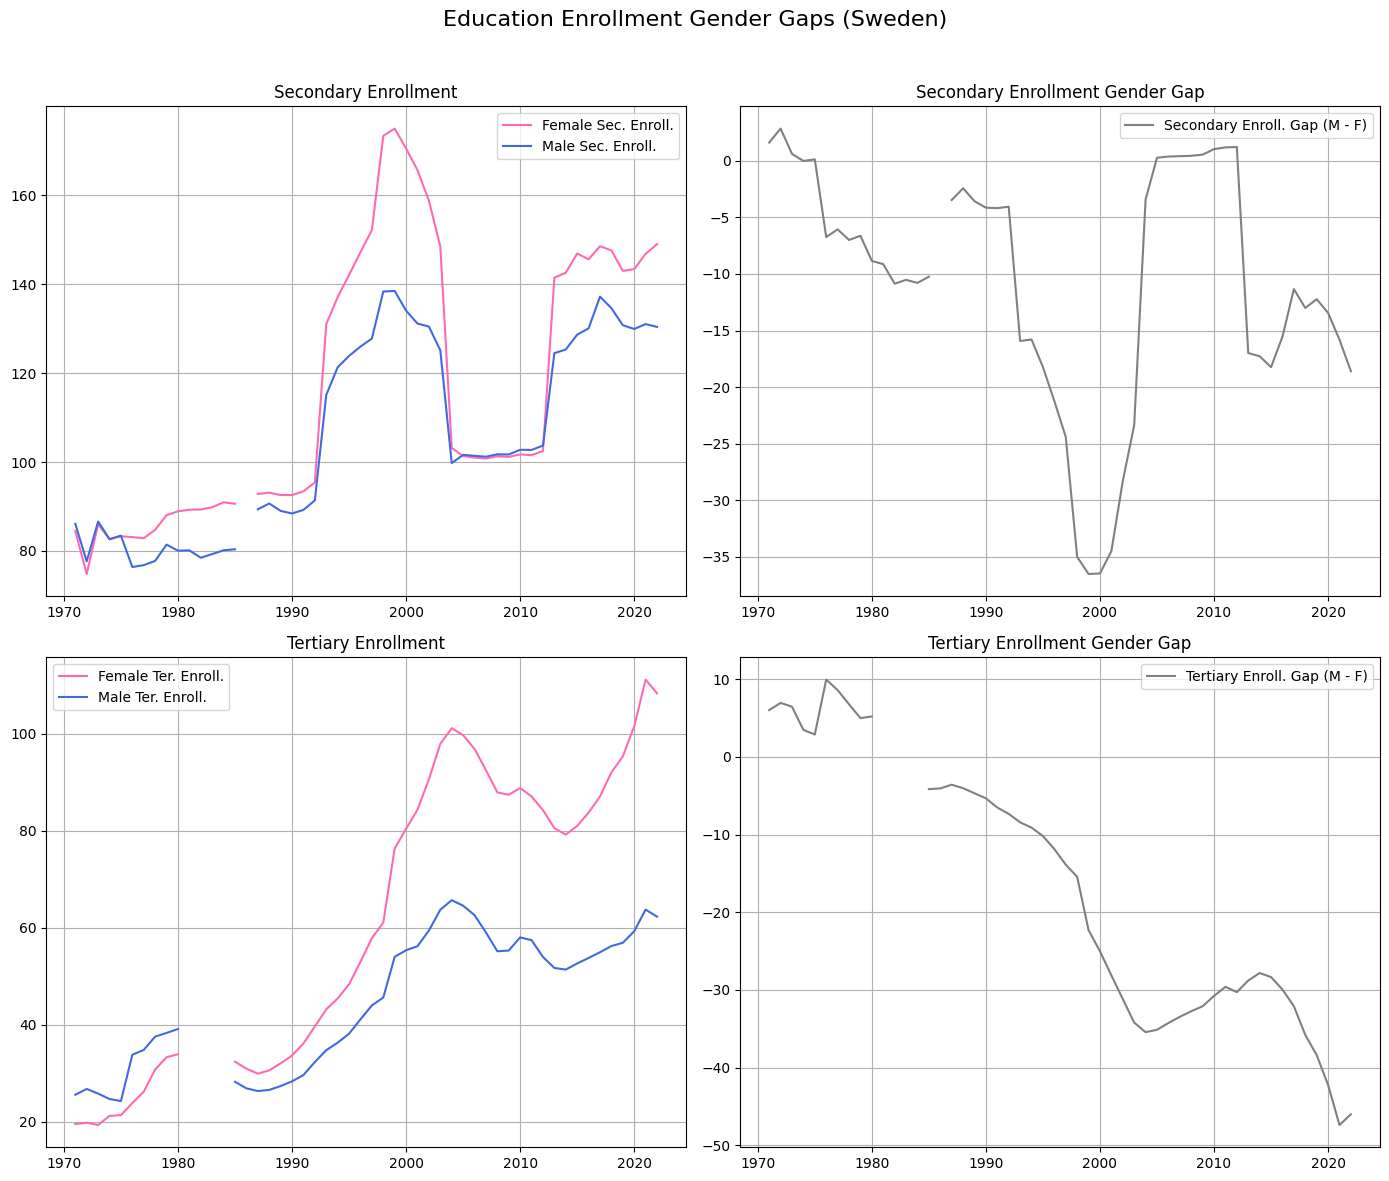

In [12]:
# ✅ Plot Education Enrollment Gender Gaps
if not df_pivot.empty and (
    ("SE.ADT.LITR.FE.ZS" in df_pivot.columns and "SE.ADT.LITR.MA.ZS" in df_pivot.columns) or
    ("SE.SEC.ENRR.FE" in df_pivot.columns and "SE.SEC.ENRR.MA" in df_pivot.columns) or
    ("SE.TER.ENRR.FE" in df_pivot.columns and "SE.TER.ENRR.MA" in df_pivot.columns)
):
    fig_enroll, axs_enroll = plt.subplots(2, 2, figsize=(14, 12))
    fig_enroll.suptitle("Education Enrollment Gender Gaps (Sweden)", fontsize=16)



    # Secondary Enrollment
    if "SE.SEC.ENRR.FE" in df_pivot.columns and "SE.SEC.ENRR.MA" in df_pivot.columns:
        axs_enroll[0, 0].plot(df_pivot.index, df_pivot["SE.SEC.ENRR.FE"], label="Female Sec. Enroll.", color="hotpink")
        axs_enroll[0, 0].plot(df_pivot.index, df_pivot["SE.SEC.ENRR.MA"], label="Male Sec. Enroll.", color="royalblue")
        axs_enroll[0, 0].set_title("Secondary Enrollment")
        axs_enroll[0, 0].legend()
        axs_enroll[0, 0].grid(True)
        if "sec_enroll_gap" in df_pivot.columns:
            axs_enroll[0, 1].plot(df_pivot.index, df_pivot["sec_enroll_gap"], label="Secondary Enroll. Gap (M - F)", color="gray")
            axs_enroll[0, 1].set_title("Secondary Enrollment Gender Gap")
            axs_enroll[0, 1].legend()
            axs_enroll[0, 1].grid(True)

    # Tertiary Enrollment
    if "SE.TER.ENRR.FE" in df_pivot.columns and "SE.TER.ENRR.MA" in df_pivot.columns:
        axs_enroll[1, 0].plot(df_pivot.index, df_pivot["SE.TER.ENRR.FE"], label="Female Ter. Enroll.", color="hotpink")
        axs_enroll[1, 0].plot(df_pivot.index, df_pivot["SE.TER.ENRR.MA"], label="Male Ter. Enroll.", color="royalblue")
        axs_enroll[1, 0].set_title("Tertiary Enrollment")
        axs_enroll[1, 0].legend()
        axs_enroll[1, 0].grid(True)
        if "ter_enroll_gap" in df_pivot.columns:
            axs_enroll[1, 1].plot(df_pivot.index, df_pivot["ter_enroll_gap"], label="Tertiary Enroll. Gap (M - F)", color="gray")
            axs_enroll[1, 1].set_title("Tertiary Enrollment Gender Gap")
            axs_enroll[1, 1].legend()
            axs_enroll[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## 📚 Education Enrollment in Sweden: A Look at Gender

When we examine enrollment trends across different education levels in Sweden, some clear gender patterns begin to emerge.

### 🎓 Secondary Education

Throughout much of the period covered by the data, a consistently higher proportion of girls than boys have been enrolled in secondary education. While both genders maintain high levels of participation, girls have often held a slight edge. This gap widened notably during the late 20th and early 21st centuries. In recent years, the difference may be narrowing somewhat, but overall, secondary enrollment still leans slightly in favor of girls.

### 🏫 Tertiary Education

The gender gap becomes even more pronounced at the university level. Since the 1990s, women's enrollment in tertiary education has steadily outpaced that of men. While both men and women are increasingly attending college or university, the upward trend is significantly steeper for women. For decades now, women in Sweden have been enrolling in higher education in noticeably greater numbers than men.

---

### 🔍 Summary

Sweden's education data reveals a strong and sustained trend: girls and women are more likely to enroll in both secondary and tertiary education than boys and men. This stands in contrast to patterns observed in countries like Bangladesh, where gender gaps often favor men—especially in higher education. The Swedish case provides a valuable comparative perspective on how gender and education interact in different national contexts.


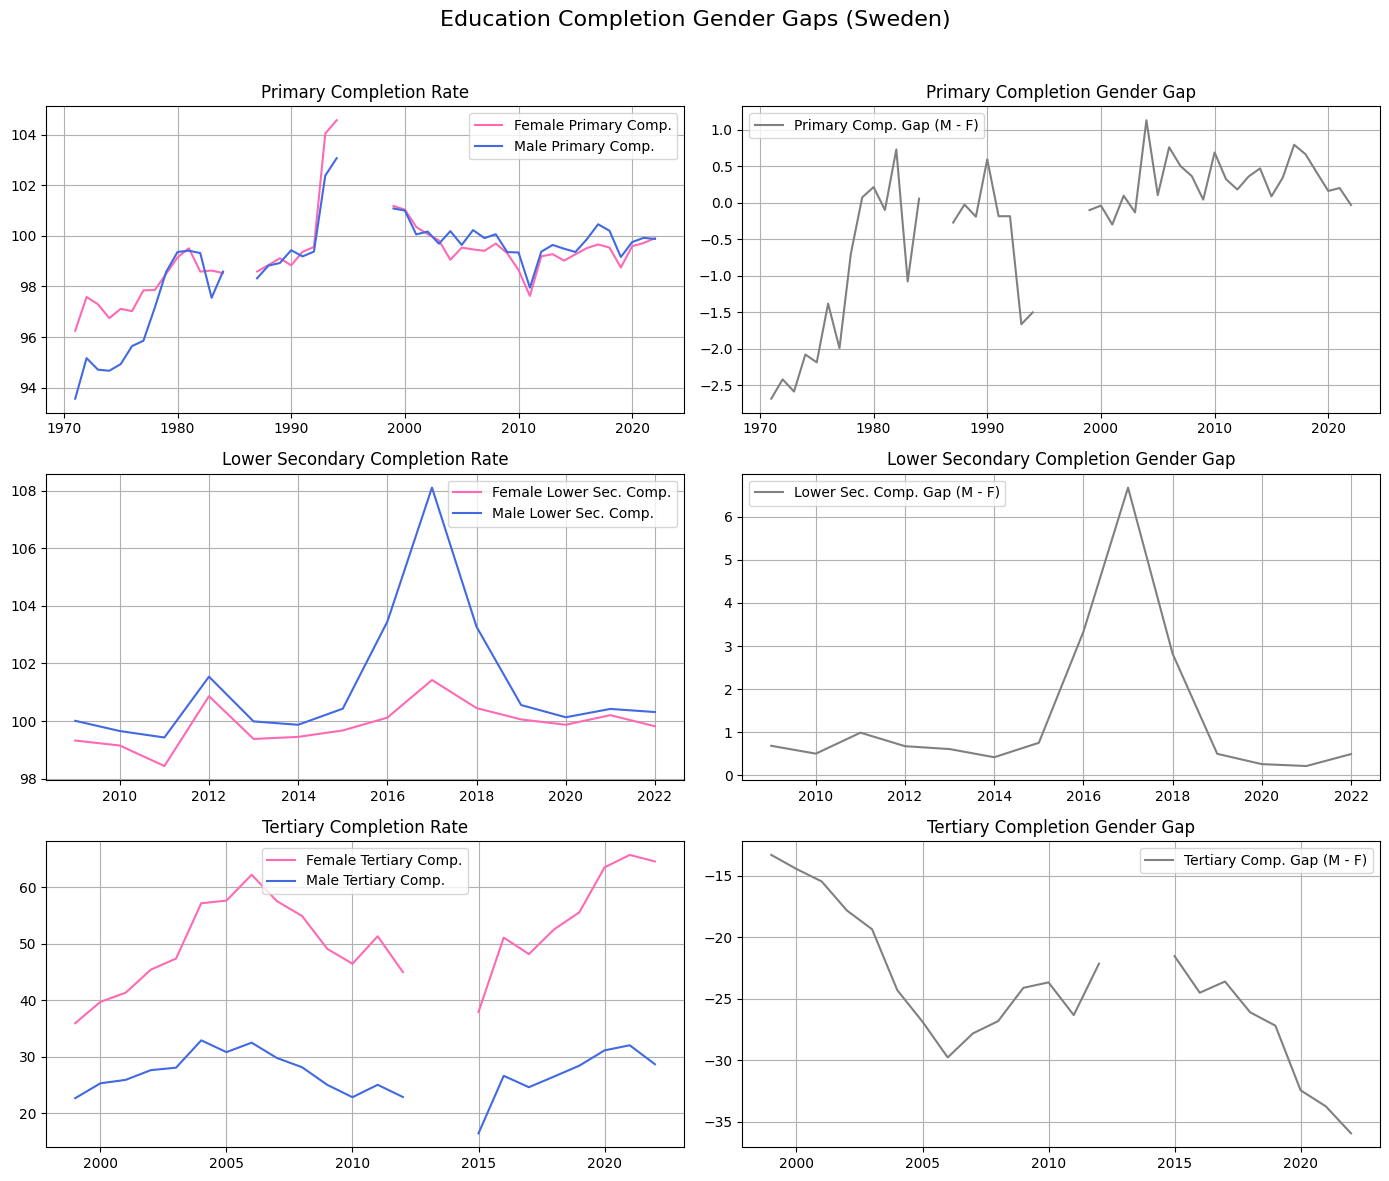

In [13]:
# ✅ Plot Education Completion Gender Gaps
if not df_pivot.empty and (
    ("SE.PRM.CMPT.FE.ZS" in df_pivot.columns and "SE.PRM.CMPT.MA.ZS" in df_pivot.columns) or
    ("SE.SEC.CMPT.LO.FE.ZS" in df_pivot.columns and "SE.SEC.CMPT.LO.MA.ZS" in df_pivot.columns) or
    ("SE.TER.CMPL.FE.ZS" in df_pivot.columns and "SE.TER.CMPL.MA.ZS" in df_pivot.columns)
):
    fig_complete, axs_complete = plt.subplots(3, 2, figsize=(14, 12))
    fig_complete.suptitle("Education Completion Gender Gaps (Sweden)", fontsize=16)

    # Primary Completion
    if "SE.PRM.CMPT.FE.ZS" in df_pivot.columns and "SE.PRM.CMPT.MA.ZS" in df_pivot.columns:
        axs_complete[0, 0].plot(df_pivot.index, df_pivot["SE.PRM.CMPT.FE.ZS"], label="Female Primary Comp.", color="hotpink")
        axs_complete[0, 0].plot(df_pivot.index, df_pivot["SE.PRM.CMPT.MA.ZS"], label="Male Primary Comp.", color="royalblue")
        axs_complete[0, 0].set_title("Primary Completion Rate")
        axs_complete[0, 0].legend()
        axs_complete[0, 0].grid(True)
        if "primary_completion_gap" in df_pivot.columns:
            axs_complete[0, 1].plot(df_pivot.index, df_pivot["primary_completion_gap"], label="Primary Comp. Gap (M - F)", color="gray")
            axs_complete[0, 1].set_title("Primary Completion Gender Gap")
            axs_complete[0, 1].legend()
            axs_complete[0, 1].grid(True)

    # Lower Secondary Completion
    if "SE.SEC.CMPT.LO.FE.ZS" in df_pivot.columns and "SE.SEC.CMPT.LO.MA.ZS" in df_pivot.columns:
        axs_complete[1, 0].plot(df_pivot.index, df_pivot["SE.SEC.CMPT.LO.FE.ZS"], label="Female Lower Sec. Comp.", color="hotpink")
        axs_complete[1, 0].plot(df_pivot.index, df_pivot["SE.SEC.CMPT.LO.MA.ZS"], label="Male Lower Sec. Comp.", color="royalblue")
        axs_complete[1, 0].set_title("Lower Secondary Completion Rate")
        axs_complete[1, 0].legend()
        axs_complete[1, 0].grid(True)
        if "lower_secondary_completion_gap" in df_pivot.columns:
            axs_complete[1, 1].plot(df_pivot.index, df_pivot["lower_secondary_completion_gap"], label="Lower Sec. Comp. Gap (M - F)", color="gray")
            axs_complete[1, 1].set_title("Lower Secondary Completion Gender Gap")
            axs_complete[1, 1].legend()
            axs_complete[1, 1].grid(True)

    # Tertiary Completion
    if "SE.TER.CMPL.FE.ZS" in df_pivot.columns and "SE.TER.CMPL.MA.ZS" in df_pivot.columns:
        axs_complete[2, 0].plot(df_pivot.index, df_pivot["SE.TER.CMPL.FE.ZS"], label="Female Tertiary Comp.", color="hotpink")
        axs_complete[2, 0].plot(df_pivot.index, df_pivot["SE.TER.CMPL.MA.ZS"], label="Male Tertiary Comp.", color="royalblue")
        axs_complete[2, 0].set_title("Tertiary Completion Rate")
        axs_complete[2, 0].legend()
        axs_complete[2, 0].grid(True)
        if "tertiary_completion_gap" in df_pivot.columns:
            axs_complete[2, 1].plot(df_pivot.index, df_pivot["tertiary_completion_gap"], label="Tertiary Comp. Gap (M - F)", color="gray")
            axs_complete[2, 1].set_title("Tertiary Completion Gender Gap")
            axs_complete[2, 1].legend()
            axs_complete[2, 1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## 🎓 Education Completion Gender Gaps in Sweden

This visual analysis explores how male and female students in Sweden have completed primary, lower secondary, and tertiary education over time, along with the corresponding gender gaps at each level.

### 📘 Primary Completion Rate

Both male and female students in Sweden have consistently shown very high primary school completion rates, generally around or above 100%. While there have been periods where girls slightly outperformed boys, the gender gap in primary completion has remained minimal. The gender gap graph for this stage shows slight fluctuations over the years, with the advantage occasionally shifting from females to males, but always remaining quite small. This indicates near-parity in primary education.

### 📗 Lower Secondary Completion Rate

For lower secondary education, a more noticeable gender difference emerged in the early 2010s. Boys began to show higher completion rates than girls, with the most significant spike occurring around 2016, where the gender gap peaked at over 6 percentage points in favor of boys. However, this gap narrowed in the following years, and by 2022, the difference had reduced substantially. This suggests a short-term divergence that has since moved closer to balance.

### 📕 Tertiary Completion Rate

Tertiary education completion reveals the most dramatic gender contrast. Since 2000, women in Sweden have consistently completed higher education at significantly higher rates than men. The gender gap has widened steadily, reaching over 35 percentage points in recent years. While male completion rates have fluctuated, the upward trajectory for women is both sustained and steep. This marks a clear and persistent trend favoring women in university-level education.

---

### 🧠 Interpretation

The data reflects a broader global pattern observed in many developed nations: **gender gaps in education are not only closing but, in some cases, reversing**—particularly in higher education. In Sweden, gender equality in access and participation appears well-established, with **women outperforming men at the tertiary level by a considerable margin**. These patterns suggest a successful education system that supports female achievement, while also highlighting potential areas of concern for male participation in higher education.


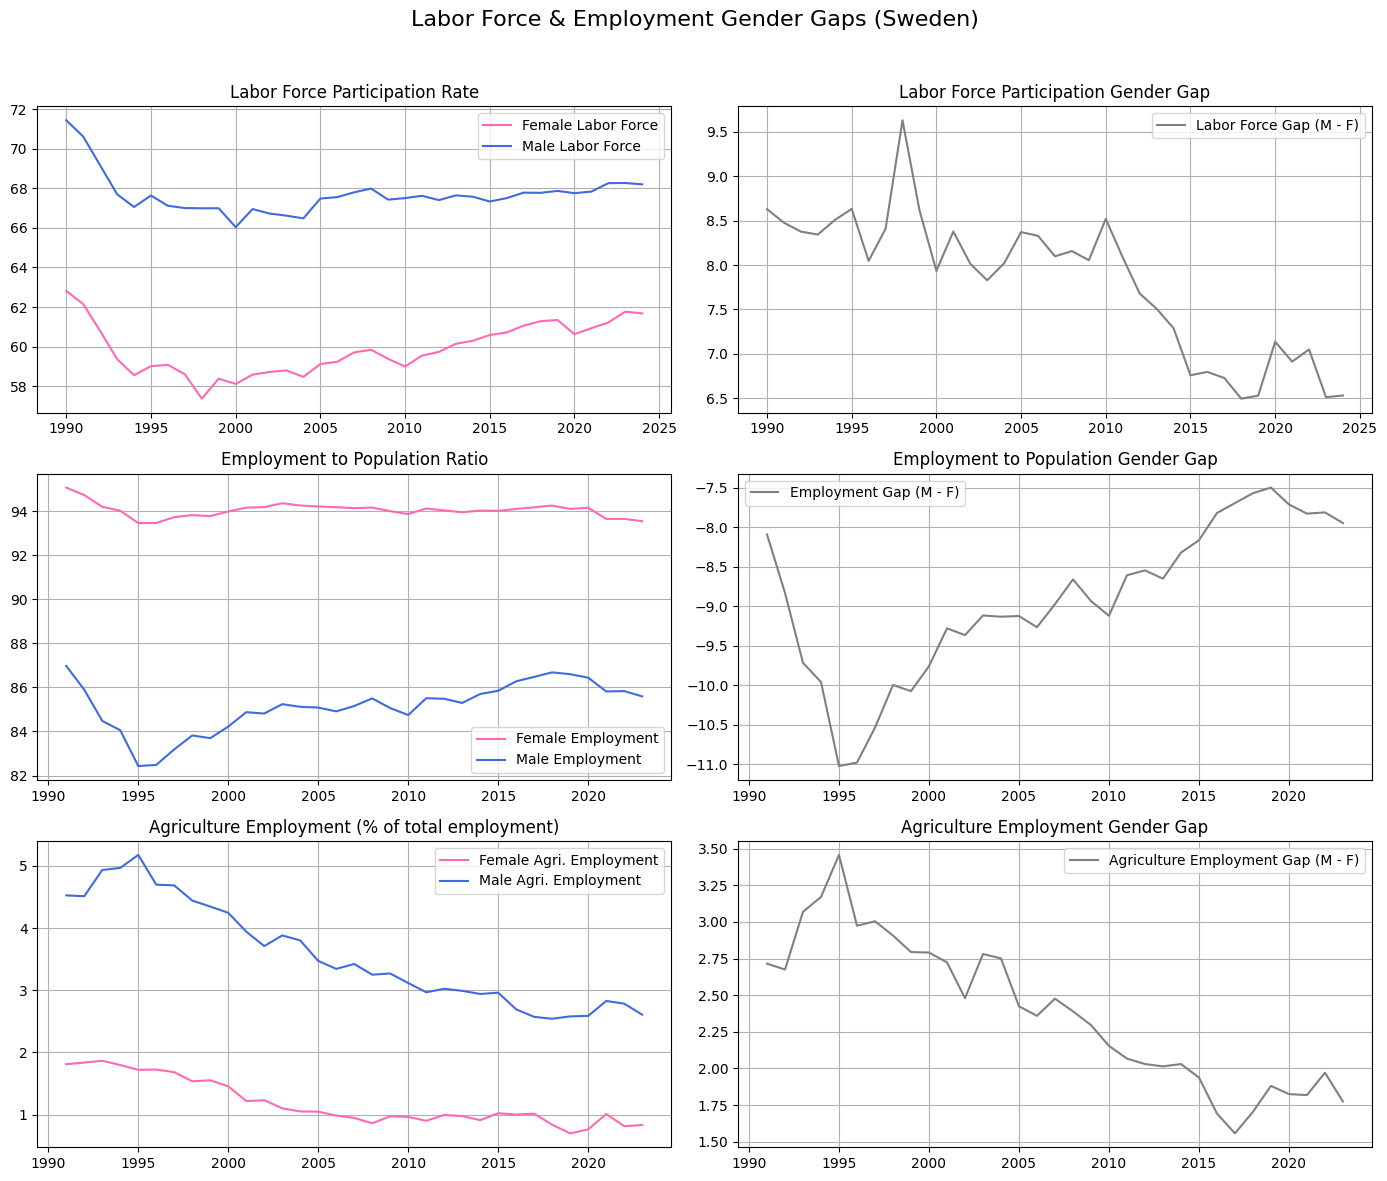

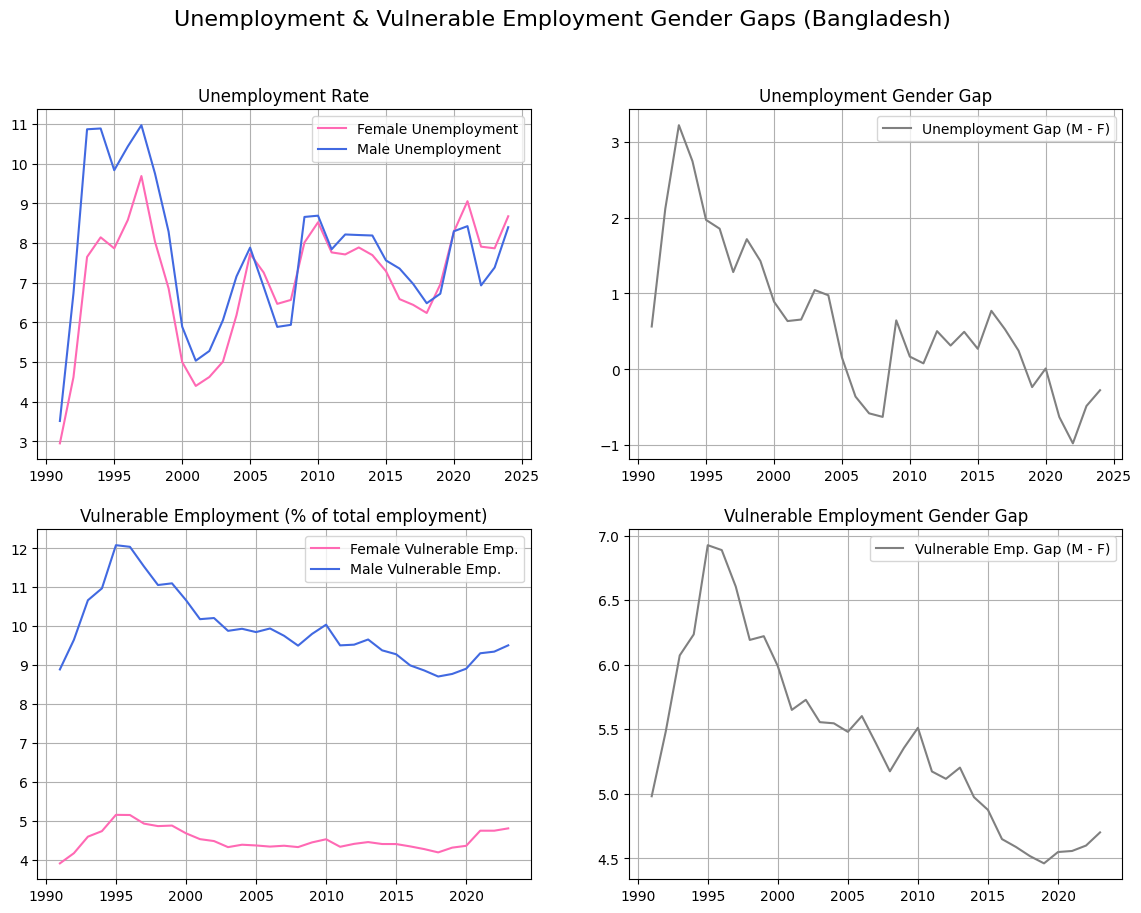

In [14]:
# ✅ Plot Labor Force and Employment Gender Gaps
if not df_pivot.empty and (
    ("SL.TLF.CACT.FE.ZS" in df_pivot.columns and "SL.TLF.CACT.MA.ZS" in df_pivot.columns) or
    ("SL.EMP.WORK.FE.ZS" in df_pivot.columns and "SL.EMP.WORK.MA.ZS" in df_pivot.columns) or
    ("SL.AGR.EMPL.FE.ZS" in df_pivot.columns and "SL.AGR.EMPL.MA.ZS" in df_pivot.columns) or
    ("SL.UEM.TOTL.FE.ZS" in df_pivot.columns and "SL.UEM.TOTL.MA.ZS" in df_pivot.columns)
    or ("SL.EMP.VULN.FE.ZS" in df_pivot.columns and "SL.EMP.VULN.MA.ZS" in df_pivot.columns)
):
    fig_labor, axs_labor = plt.subplots(3, 2, figsize=(14, 12))
    fig_labor.suptitle("Labor Force & Employment Gender Gaps (Sweden)", fontsize=16)

    # Labor Force Participation
    if "SL.TLF.CACT.FE.ZS" in df_pivot.columns and "SL.TLF.CACT.MA.ZS" in df_pivot.columns:
        axs_labor[0, 0].plot(df_pivot.index, df_pivot["SL.TLF.CACT.FE.ZS"], label="Female Labor Force", color="hotpink")
        axs_labor[0, 0].plot(df_pivot.index, df_pivot["SL.TLF.CACT.MA.ZS"], label="Male Labor Force", color="royalblue")
        axs_labor[0, 0].set_title("Labor Force Participation Rate")
        axs_labor[0, 0].legend()
        axs_labor[0, 0].grid(True)
        if "labor_gap" in df_pivot.columns:
            axs_labor[0, 1].plot(df_pivot.index, df_pivot["labor_gap"], label="Labor Force Gap (M - F)", color="gray")
            axs_labor[0, 1].set_title("Labor Force Participation Gender Gap")
            axs_labor[0, 1].legend()
            axs_labor[0, 1].grid(True)

    # Employment to Population
    if "SL.EMP.WORK.FE.ZS" in df_pivot.columns and "SL.EMP.WORK.MA.ZS" in df_pivot.columns:
        axs_labor[1, 0].plot(df_pivot.index, df_pivot["SL.EMP.WORK.FE.ZS"], label="Female Employment", color="hotpink")
        axs_labor[1, 0].plot(df_pivot.index, df_pivot["SL.EMP.WORK.MA.ZS"], label="Male Employment", color="royalblue")
        axs_labor[1, 0].set_title("Employment to Population Ratio")
        axs_labor[1, 0].legend()
        axs_labor[1, 0].grid(True)
        if "employment_gap" in df_pivot.columns:
            axs_labor[1, 1].plot(df_pivot.index, df_pivot["employment_gap"], label="Employment Gap (M - F)", color="gray")
            axs_labor[1, 1].set_title("Employment to Population Gender Gap")
            axs_labor[1, 1].legend()
            axs_labor[1, 1].grid(True)

    # Agriculture Employment
    if "SL.AGR.EMPL.FE.ZS" in df_pivot.columns and "SL.AGR.EMPL.MA.ZS" in df_pivot.columns:
        axs_labor[2, 0].plot(df_pivot.index, df_pivot["SL.AGR.EMPL.FE.ZS"], label="Female Agri. Employment", color="hotpink")
        axs_labor[2, 0].plot(df_pivot.index, df_pivot["SL.AGR.EMPL.MA.ZS"], label="Male Agri. Employment", color="royalblue")
        axs_labor[2, 0].set_title("Agriculture Employment (% of total employment)")
        axs_labor[2, 0].legend()
        axs_labor[2, 0].grid(True)
        if "agri_gap" in df_pivot.columns:
            axs_labor[2, 1].plot(df_pivot.index, df_pivot["agri_gap"], label="Agriculture Employment Gap (M - F)", color="gray")
            axs_labor[2, 1].set_title("Agriculture Employment Gender Gap")
            axs_labor[2, 1].legend()
            axs_labor[2, 1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    fig_unemp_vuln, axs_unemp_vuln = plt.subplots(2, 2, figsize=(14, 10))
    fig_unemp_vuln.suptitle("Unemployment & Vulnerable Employment Gender Gaps (Bangladesh)", fontsize=16)

    # Unemployment
    if "SL.UEM.TOTL.FE.ZS" in df_pivot.columns and "SL.UEM.TOTL.MA.ZS" in df_pivot.columns:
        axs_unemp_vuln[0, 0].plot(df_pivot.index, df_pivot["SL.UEM.TOTL.FE.ZS"], label="Female Unemployment", color="hotpink")
        axs_unemp_vuln[0, 0].plot(df_pivot.index, df_pivot["SL.UEM.TOTL.MA.ZS"], label="Male Unemployment", color="royalblue")
        axs_unemp_vuln[0, 0].set_title("Unemployment Rate")
        axs_unemp_vuln[0, 0].legend()
        axs_unemp_vuln[0, 0].grid(True)
        if "unemployment_gap" in df_pivot.columns:
            axs_unemp_vuln[0, 1].plot(df_pivot.index, df_pivot["unemployment_gap"], label="Unemployment Gap (M - F)", color="gray")
            axs_unemp_vuln[0, 1].set_title("Unemployment Gender Gap")
            axs_unemp_vuln[0, 1].legend()
            axs_unemp_vuln[0, 1].grid(True)

    # Vulnerable Employment
    if "SL.EMP.VULN.FE.ZS" in df_pivot.columns and "SL.EMP.VULN.MA.ZS" in df_pivot.columns:
        axs_unemp_vuln[1, 0].plot(df_pivot.index, df_pivot["SL.EMP.VULN.FE.ZS"], label="Female Vulnerable Emp.", color="hotpink")
        axs_unemp_vuln[1, 0].plot(df_pivot.index, df_pivot["SL.EMP.VULN.MA.ZS"], label="Male Vulnerable Emp.", color="royalblue")
        axs_unemp_vuln[1, 0].set_title("Vulnerable Employment (% of total employment)")
        axs_unemp_vuln[1, 0].legend()
        axs_unemp_vuln[1, 0].grid(True)
        if "vulnerable_employment_gap" in df_pivot.columns:
            axs_unemp_vuln[1, 1].plot(df_pivot.index, df_pivot["vulnerable_employment_gap"], label="Vulnerable Emp. Gap (M - F)", color="gray")
            axs_unemp_vuln[1, 1].set_title("Vulnerable Employment Gender Gap")
            axs_unemp_vuln[1, 1].legend()
            axs_unemp_vuln[1, 1].grid(True)

    fig_labor.show()
    fig_unemp_vuln.show()

## 👩‍💼👨‍💼 Labor Force and Employment in Sweden: A Gendered View

When we explore how men and women participate in Sweden’s workforce, several key patterns emerge that reflect both progress and interesting contrasts.

### 🔹 Labor Force Participation

From the early 1990s onward, men in Sweden have typically had slightly higher labor force participation rates than women. The difference, though, is relatively small. Both men and women maintain high levels of engagement in the labor market, and the gender gap (Male - Female) remains fairly stable over time. Compared to countries like Bangladesh, where participation gaps are often more pronounced, Sweden shows a much more balanced distribution between genders in terms of workforce involvement.

### 🔹 Employment to Population Ratio

This is where things get especially interesting. Over a significant stretch of time, women in Sweden actually have a slightly higher employment-to-population ratio than men. That means, proportionally, more women are employed compared to men. The gap is modest but noticeable, with the pink line (women) often sitting above the blue line (men). The gender gap here is mostly negative, indicating this trend consistently favors women—something that’s quite different from the trends we saw in Bangladesh.

### 🔹 Agricultural Employment

In a developed economy like Sweden’s, it’s no surprise that agriculture accounts for a very small share of total employment. However, among those few who do work in agriculture, men consistently make up a slightly larger share than women. The gender gap (Male - Female) for agricultural employment is small but positive. Still, these differences are minor in the broader context of the Swedish labor market.

---

### 🌍 In Summary

Sweden’s labor and employment landscape reveals a picture of **strong gender parity**, especially when compared to countries like Bangladesh. Both men and women are highly active in the labor force, with **only a slight advantage for men in participation**. Interestingly, **women often lead in terms of actual employment rates**, flipping the usual trend seen in many parts of the world. Agricultural employment is minimal overall and slightly more male-dominated. These trends reflect the strength of Sweden’s inclusive economic policies and cultural norms that support gender equality in the workplace.


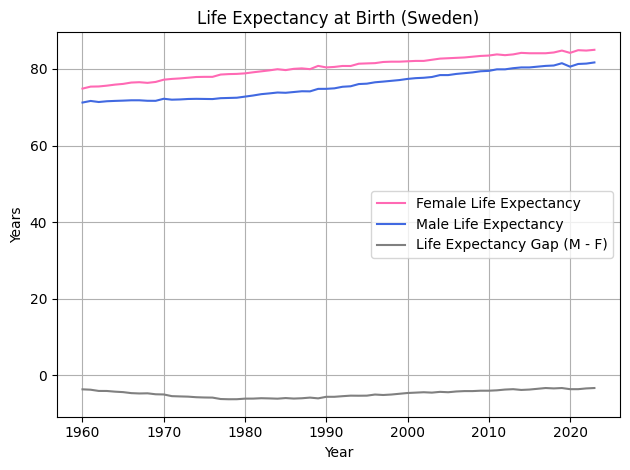

In [15]:
# ✅ Plot Life Expectancy
if not df_pivot.empty and ("SP.DYN.LE00.FE.IN" in df_pivot.columns and "SP.DYN.LE00.MA.IN" in df_pivot.columns):
    plt.figure()
    plt.plot(df_pivot.index, df_pivot["SP.DYN.LE00.FE.IN"], label="Female Life Expectancy", color="hotpink")
    plt.plot(df_pivot.index, df_pivot["SP.DYN.LE00.MA.IN"], label="Male Life Expectancy", color="royalblue")
    if "life_expectancy_gap" in df_pivot.columns:
        plt.plot(df_pivot.index, df_pivot["life_expectancy_gap"], label="Life Expectancy Gap (M - F)", color="gray")
    plt.title("Life Expectancy at Birth (Sweden)")
    plt.xlabel("Year")
    plt.ylabel("Years")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

## 🧬 Life Expectancy and Gender in Sweden

The life expectancy trends in Sweden paint a picture of steady progress and high overall health standards. From around **1960 to the present**, both men and women have seen consistent increases in life expectancy at birth—a reflection of the country's excellent healthcare system, improved living conditions, and socioeconomic development.

### 👩‍⚕️👨‍⚕️ Gender Differences in Life Expectancy

As is common globally, **women in Sweden tend to live longer than men**. The pink line (female life expectancy) consistently sits above the blue line (male life expectancy), showing a clear and stable gap between the two.

The **gray line**, representing the life expectancy gap (Male - Female), stays in the **negative range throughout** the decades—confirming that men, on average, have shorter lifespans than women. Interestingly, this gender gap doesn’t fluctuate wildly. It remains **relatively stable**, typically amounting to a few years' difference, and doesn't show strong signs of either widening or narrowing over recent decades.

---

### 🌍 In Summary

Sweden's life expectancy data showcases a society where **both men and women live long, healthy lives**, with **women consistently enjoying a slight edge**. The stable nature of the gender gap suggests that societal, behavioral, and biological factors contribute to this difference in a fairly uniform way over time. Compared to countries like Bangladesh, where the gap might be influenced by more variable socioeconomic conditions, Sweden's data reflects the outcomes of sustained development and gender equity in public health and well-being.


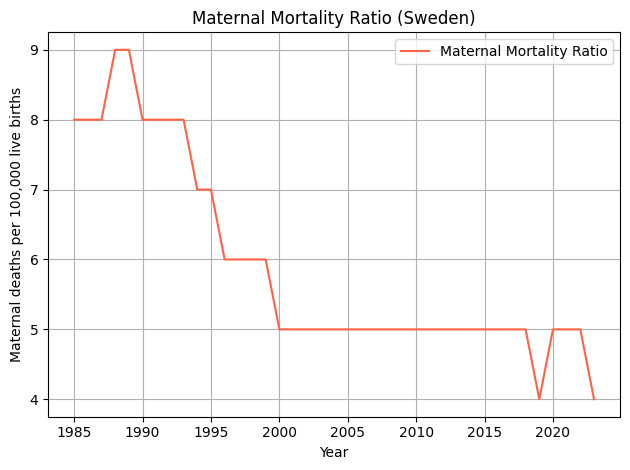

In [16]:
# ✅ Plot Maternal Mortality Ratio
if not df_pivot.empty and "SH.STA.MMRT" in df_pivot.columns:
    plt.figure()
    plt.plot(df_pivot.index, df_pivot["SH.STA.MMRT"], label="Maternal Mortality Ratio", color="tomato")
    plt.title("Maternal Mortality Ratio (Sweden)")
    plt.xlabel("Year")
    plt.ylabel("Maternal deaths per 100,000 live births")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

## 🤰 Trends in Maternal Mortality in Sweden

The graph tracking maternal mortality in Sweden from around **1985 onward** tells a compelling story about women’s health and healthcare quality in the country. The **maternal mortality ratio (MMR)**—measured as the number of maternal deaths per 100,000 live births—is an essential indicator of how safe childbirth is for women.

### 📉 Exceptionally Low Maternal Mortality Rates

One of the most striking observations is just how **low the MMR is in Sweden**, especially when compared to countries like Bangladesh. Throughout the entire period shown, the MMR in Sweden has mostly stayed **below 10 deaths per 100,000 live births**, which is extraordinarily low by global standards.

The trend begins at around **8 maternal deaths**, climbs slightly to **9**, and then generally trends **downward**. There are a few plateaus and minor fluctuations, but overall, the line steadily moves toward even **lower mortality rates**, reaching as low as **4 in the most recent years**.

---

### 🩺 A Testament to Strong Healthcare

This consistently low maternal mortality ratio reflects the **strength and accessibility of Sweden’s healthcare system**, particularly for pregnant women and new mothers. The **flat, stable trend** at such low levels underscores a **well-established maternal health infrastructure** and a strong emphasis on **preventive care and medical intervention** when needed.

---

### ✅ In Summary

Sweden stands out as a **global model for maternal health**, with one of the lowest maternal mortality ratios in the world. The data shows that **childbirth in Sweden is extremely safe**, thanks to decades of investment in healthcare, trained professionals, and accessible maternal services. This presents a **stark contrast to the more volatile and higher-risk trends** seen in lower-income countries.


